In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# **Basic data**

In [ ]:
# Define the data for traffic distribution across different times of the day
data_td = {
    'time': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59',
             '06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59',
             '12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59',
             '18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59'],
    'probability': [0.8, 0.4, 0.3, 0.4, 0.8, 2.0, 4.5, 7.0, 7.0, 6.0, 5.7, 5.9, 6.0, 6.1, 6.5, 7.0,
                    7.7, 7.6, 6.0, 4.2, 3.0, 2.2, 1.8, 1.1]
}

# Create a DataFrame
traffic_distribution_df = pd.DataFrame(data_td)
traffic_distribution_df['hour'] = range(24)  # Add hour column

# Normalize the probabilities to sum to 1
traffic_distribution_df['probability'] /= traffic_distribution_df['probability'].sum()

# Maximum and minimum speeds in the city (in km/h)
max_speed = 50
min_speed = 10

# Calculate average speed based on traffic probability
traffic_distribution_df['average_speed1'] = max_speed * (1 - traffic_distribution_df['probability'] / max(traffic_distribution_df['probability']))
traffic_distribution_df['average_speed1'] = traffic_distribution_df['average_speed1'].apply(lambda x: max(min_speed, min(max_speed, x)))

# Calculate average speed for the next hour
traffic_distribution_df['average_speed2'] = traffic_distribution_df['average_speed1'].shift(-1)

# For the last hour, use the speed of the first hour (or another logical value)
traffic_distribution_df.at[23, 'average_speed2'] = traffic_distribution_df.at[0, 'average_speed1']

# Round speeds to two decimal places
traffic_distribution_df['average_speed1'] = traffic_distribution_df['average_speed1'].round(2)
traffic_distribution_df['average_speed2'] = traffic_distribution_df['average_speed2'].round(2)

# Ensure 'average_speed' columns exist and have no zero values
traffic_distribution_df['average_speed1'].replace(0, 1e-3, inplace=True)
traffic_distribution_df['average_speed2'].replace(0, 1e-3, inplace=True)

# Specify the path to save the CSV file
csv_path = 'traffic_distribution.csv'

# Save the DataFrame to a CSV file
traffic_distribution_df.to_csv(csv_path, index=False)

In [ ]:
# Define the data for vehicle categories and their initial percentages
data_vd = {
    'category': ['Petrol passenger cars', 'Diesel passenger cars', 'Commercial Vehicles (diesel)', 'Motorcycles (petrol)'],
    'probability': [45, 39, 12, 2]
}

# Create a DataFrame
vehicle_categories_df = pd.DataFrame(data_vd)

# Normalize the probabilities to sum to 1
vehicle_categories_df['probability'] /= vehicle_categories_df['probability'].sum()

# Specify the path to save the CSV file
csv_path = 'vehicle_categories.csv'

# Save the DataFrame to a CSV file
vehicle_categories_df.to_csv(csv_path, index=False)

In [ ]:
# Data for vehicle ages including motorcycles
data_ed = {
    'Vehicle Type': ['Passenger car Slovakia', 'CV Slovakia', 'Motorcycle Slovakia'],
    '2021-2018': [338692, 44079, 0],   # Euro 6
    '2017-2016': [210013, 25051, 0],     # Euro 5
    '2015-2013': [274634, 30208, 0],     # Euro 4
    '2012-2010': [287296, 30836, 5652],  # Euro 3 for motorcycles
    '<2010': [1727293, 258533, 62074]    # Euro 2 and Euro 1 for motorcycles
}

vehicle_age_df = pd.DataFrame(data_ed)

# Calculate the total for normalization
vehicle_age_df['Total'] = vehicle_age_df.drop('Vehicle Type', axis=1).sum(axis=1)

# Assign Euro class probabilities based on vehicle age groups
vehicle_age_df['Euro 6'] = vehicle_age_df['2021-2018'] / vehicle_age_df['Total']
vehicle_age_df['Euro 5'] = vehicle_age_df['2017-2016'] / vehicle_age_df['Total']
vehicle_age_df['Euro 4'] = vehicle_age_df['2015-2013'] / vehicle_age_df['Total']
vehicle_age_df['Euro 3'] = vehicle_age_df['2012-2010'] / vehicle_age_df['Total']
vehicle_age_df['Euro 2'] = vehicle_age_df['<2010'] * 0.65 / vehicle_age_df['Total']
vehicle_age_df['Euro 1'] = vehicle_age_df['<2010'] * 0.35 / vehicle_age_df['Total']

# Adjust for motorcycles only having Euro 1 and Euro 3 classifications
vehicle_age_df.loc[vehicle_age_df['Vehicle Type'] == 'Motorcycle Slovakia', ['Euro 6', 'Euro 5', 'Euro 4', 'Euro 2']] = 0
vehicle_age_df.loc[vehicle_age_df['Vehicle Type'] == 'Motorcycle Slovakia', 'Euro 3'] = 0.52  # 52% of motorcycles are Euro 3
vehicle_age_df.loc[vehicle_age_df['Vehicle Type'] == 'Motorcycle Slovakia', 'Euro 1'] = 0.48  # 48% of motorcycles are Euro 1

# Dropping the individual year columns for clarity
euro_classes_df = vehicle_age_df[['Vehicle Type', 'Euro 6', 'Euro 5', 'Euro 4', 'Euro 3', 'Euro 2', 'Euro 1']]

# Setting index for better plotting
euro_classes_df.set_index('Vehicle Type', inplace=True)

# Specify the path to save the CSV file
csv_path = 'euro_classes.csv'

# Save the DataFrame to a CSV file
euro_classes_df.to_csv(csv_path, index=True)

# **Algorithm 1**

Visualizing Case 1


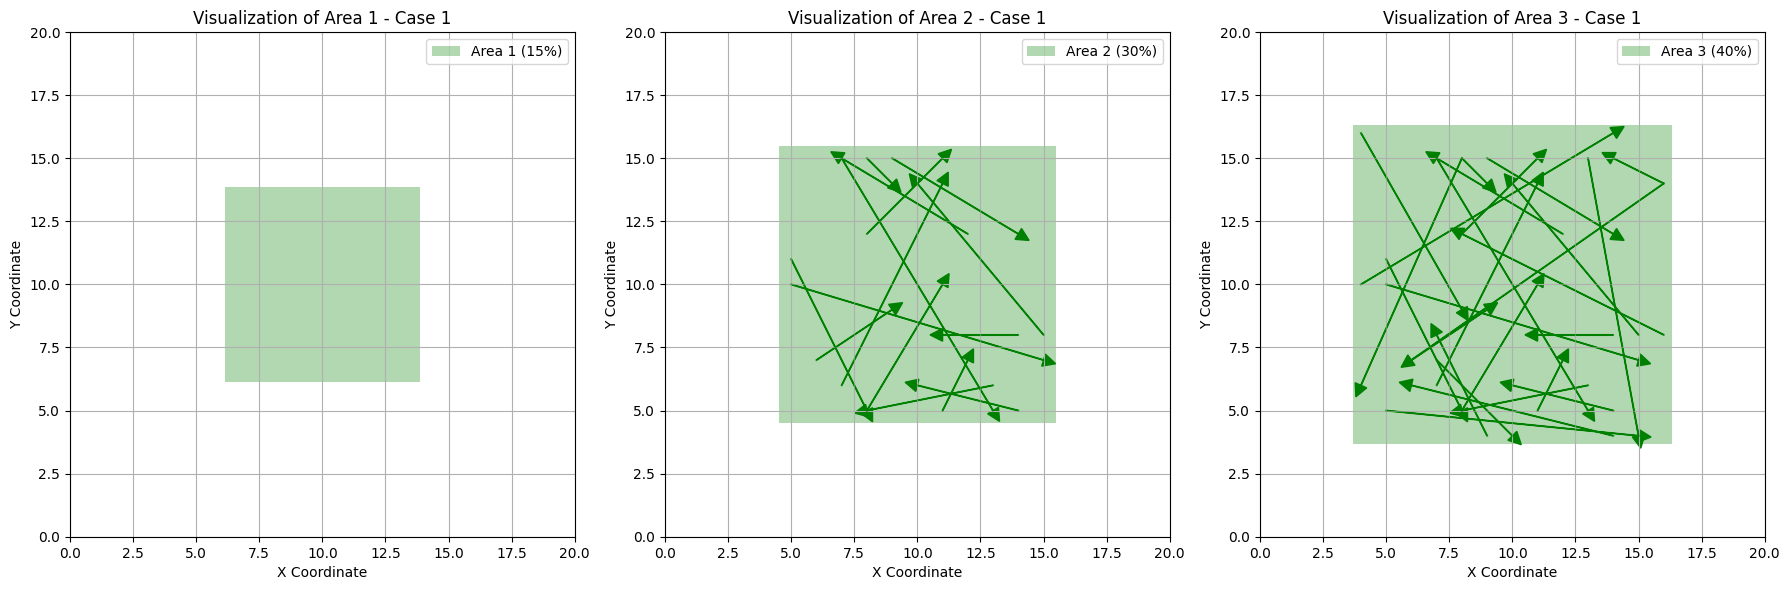

Visualizing Case 2


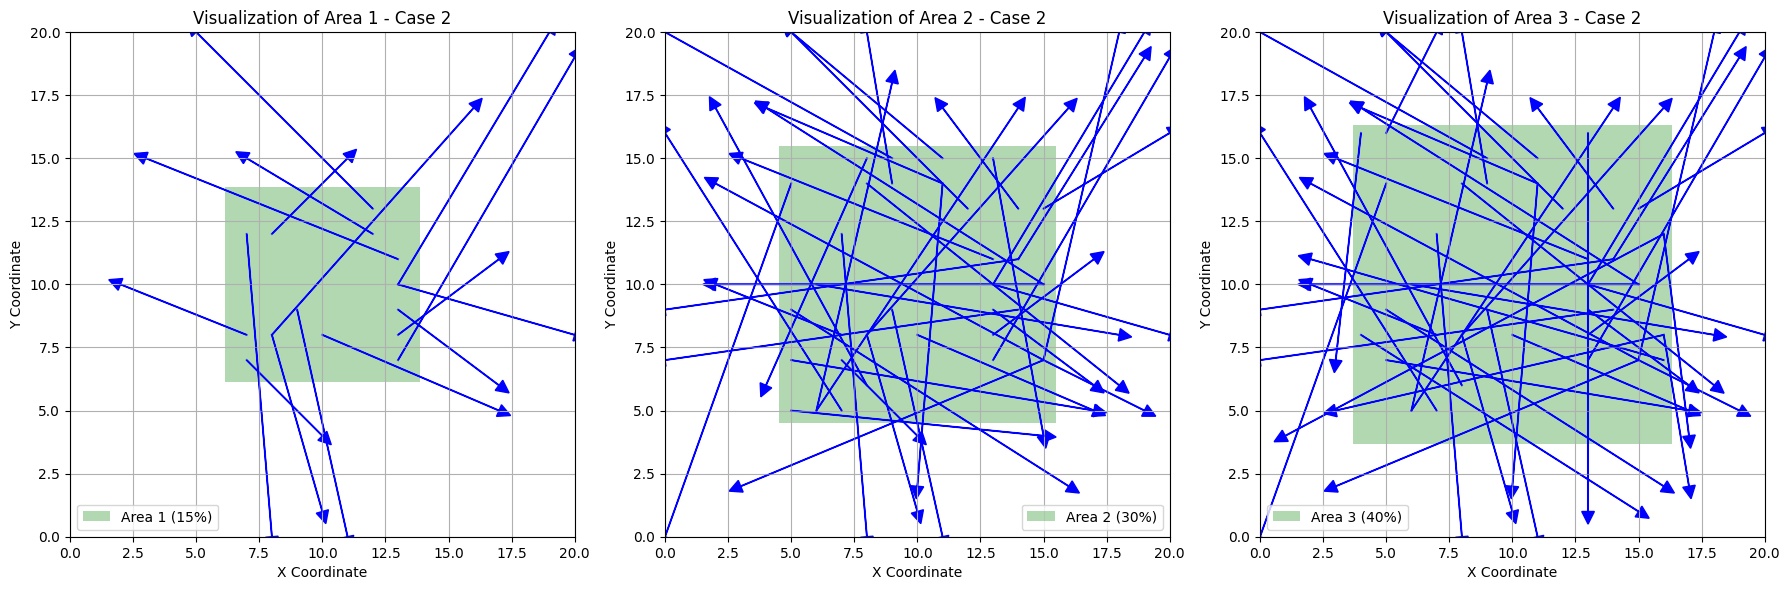

Visualizing Case 3


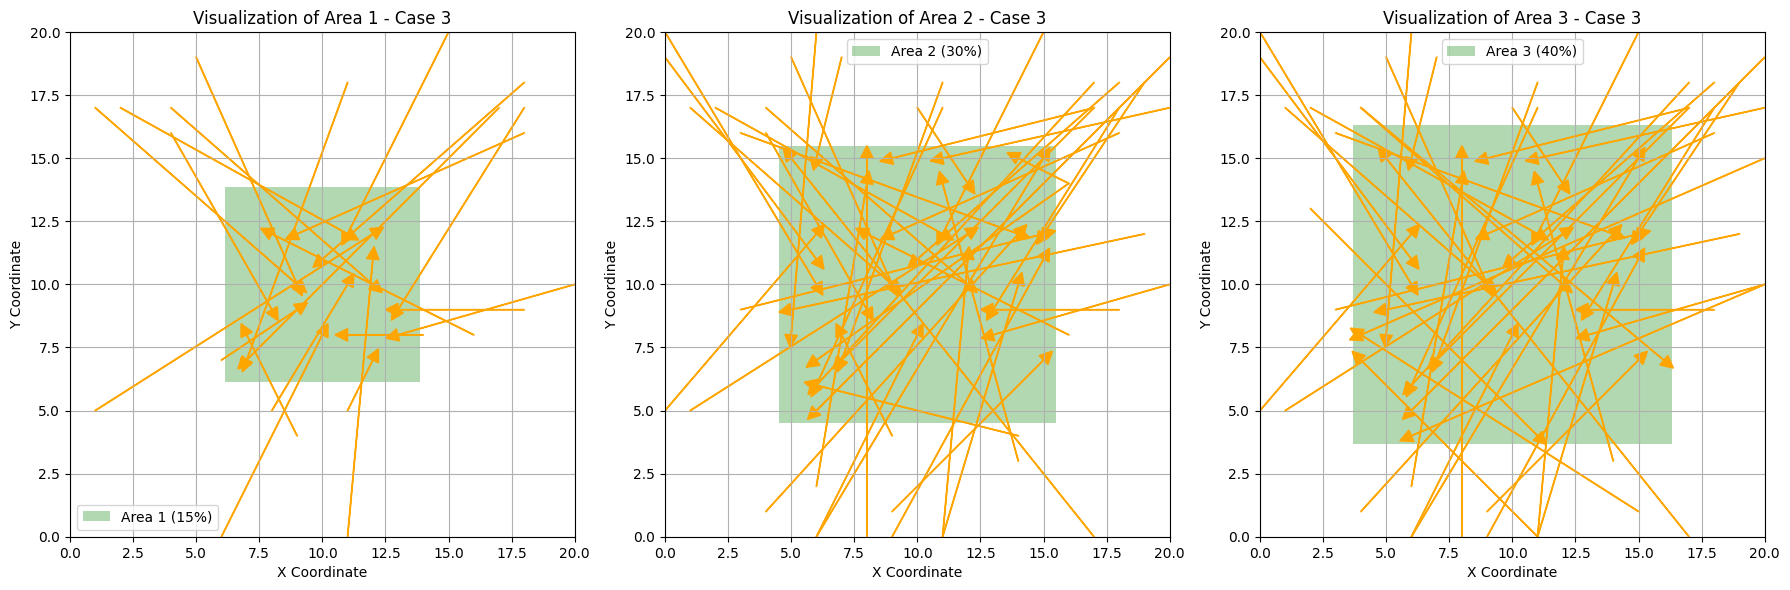

Visualizing Case 4


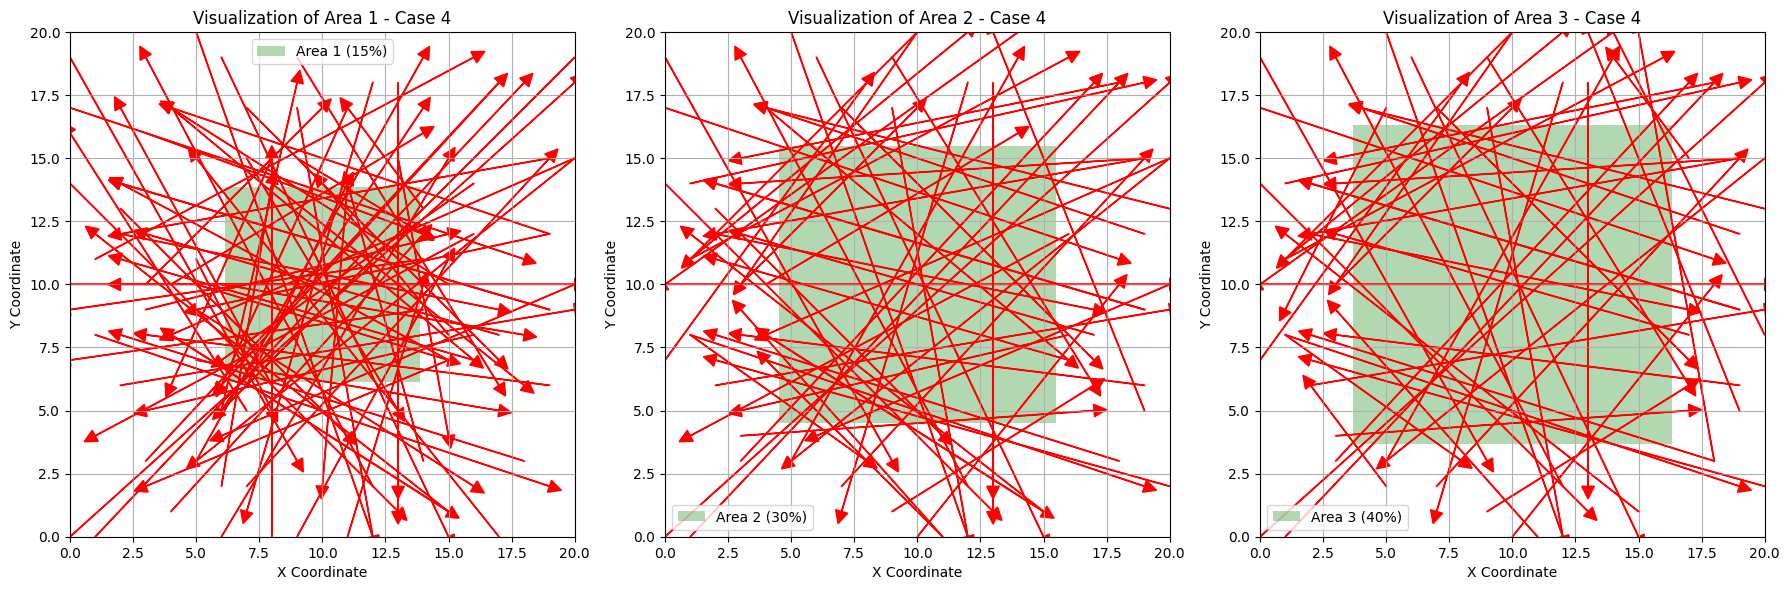

Visualizing Case 5


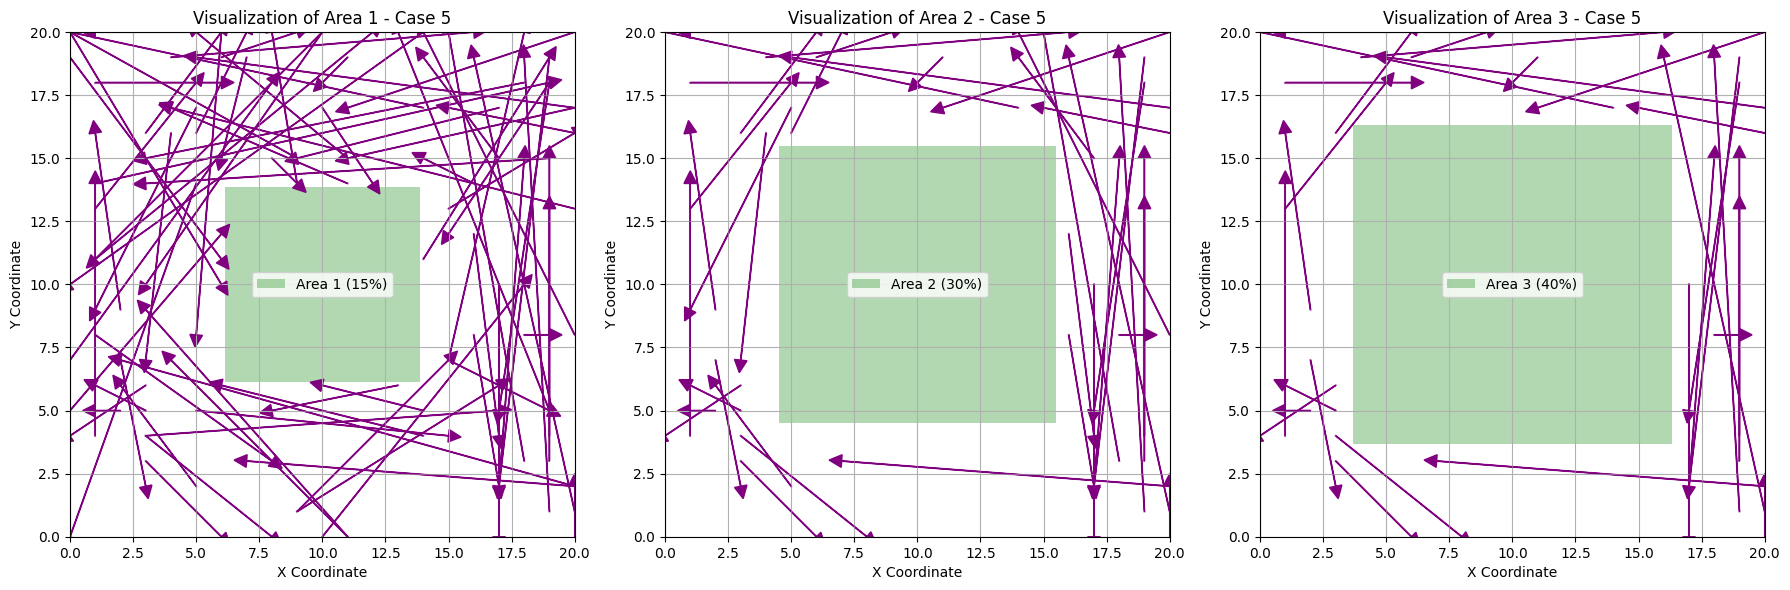


Distribution of cases for Area 1:
  Case 1: 0 trips (0.00%)
  Case 2: 16 trips (8.00%)
  Case 3: 22 trips (11.00%)
  Case 4: 81 trips (40.50%)
  Case 5: 81 trips (40.50%)

Distribution of cases for Area 2:
  Case 1: 15 trips (7.50%)
  Case 2: 42 trips (21.00%)
  Case 3: 45 trips (22.50%)
  Case 4: 59 trips (29.50%)
  Case 5: 39 trips (19.50%)

Distribution of cases for Area 3:
  Case 1: 26 trips (13.00%)
  Case 2: 47 trips (23.50%)
  Case 3: 45 trips (22.50%)
  Case 4: 52 trips (26.00%)
  Case 5: 30 trips (15.00%)


In [ ]:
# Define function to generate random coordinates within the 20x20 space as integers
def generate_random_coordinates():
    return (random.randint(0, 20), random.randint(0, 20)), (random.randint(0, 20), random.randint(0, 20))

# Function to calculate Euclidean distance
def euclidean_distance(origin, destination):
    return math.sqrt((origin[0] - destination[0])**2 + (origin[1] - destination[1])**2)

# Function to generate a single trip
def generate_trip():
    origin, destination = generate_random_coordinates()
    distance_km = euclidean_distance(origin, destination)
    return {
        'origin': origin,
        'destination': destination,
        'distance_km': round(distance_km, 3)  # Round to 3 decimal places
    }

# Generate 5000 trips
trips = [generate_trip() for _ in range(200)]

# Convert to DataFrame
trips_df = pd.DataFrame(trips)

# Function to determine if two line segments intersect
def lines_intersect(p1, q1, p2, q2):
    def orientation(p, q, r):
        val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
        if val == 0:
            return 0
        return 1 if val > 0 else 2

    def on_segment(p, q, r):
        if min(p[0], q[0]) <= r[0] <= max(p[0], q[0]) and min(p[1], q[1]) <= r[1] <= max(p[1], q[1]):
            return True
        return False

    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, q1, p2):
        return True
    if o2 == 0 and on_segment(p1, q1, q2):
        return True
    if o3 == 0 and on_segment(p2, q2, p1):
        return True
    if o4 == 0 and on_segment(p2, q2, q1):
        return True

    return False

# Function to determine the case for each trip based on LEZ size with improved logic
def determine_case(trip, lez_size):
    center = 10  # Center for 20x20 space
    half_size = lez_size / 2

    origin = trip['origin']
    destination = trip['destination']

    origin_inside = (center - half_size <= origin[0] <= center + half_size and
                     center - half_size <= origin[1] <= center + half_size)
    destination_inside = (center - half_size <= destination[0] <= center + half_size and
                          center - half_size <= destination[1] <= center + half_size)

    if origin_inside and destination_inside:
        return 1  # Both points inside the LEZ
    elif origin_inside and not destination_inside:
        return 2  # Departure from inside LEZ, arrival outside LEZ
    elif not origin_inside and destination_inside:
        return 3  # Departure from outside LEZ, arrival inside LEZ
    elif not origin_inside and not destination_inside:
        # Check if the route passes through the LEZ
        zone_edges = [
            ((center - half_size, center - half_size), (center + half_size, center - half_size)),
            ((center + half_size, center - half_size), (center + half_size, center + half_size)),
            ((center + half_size, center + half_size), (center - half_size, center + half_size)),
            ((center - half_size, center + half_size), (center - half_size, center - half_size))
        ]

        for edge in zone_edges:
            if lines_intersect(origin, destination, edge[0], edge[1]):
                return 4  # Route outside LEZ, passing through LEZ

        return 5  # Both points and route entirely outside LEZ

# Correct the sizes of the zones based on the area percentages
lez_sizes = {'Area 1': 7.74, 'Area 2': 10.95, 'Area 3': 12.65}  # Scaled for 20x20 space
lez_sizes_display = {'Area 1': 15, 'Area 2': 30, 'Area 3': 40}

# Apply LEZ categories to the trips and add columns to the existing DataFrame
for area_name, lez_size in lez_sizes.items():
    trips_df[area_name + '_case'] = trips_df.apply(lambda x: determine_case(x, lez_size), axis=1)

# Function to visualize trips with different cases
def visualize_trips_by_case(trips_df, lez_sizes, lez_sizes_display, case_num):
    colors = {1: 'green', 2: 'blue', 3: 'orange', 4: 'red', 5: 'purple'}

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (area_name, lez_size) in enumerate(lez_sizes.items()):
        ax = axes[i]

        # Define the center of the space
        center = 10  # Center for 20x20 space
        half_size = lez_size / 2

        # Add a transparent green square representing the LEZ area on top
        rect = patches.Rectangle(
            (center - half_size, center - half_size),
            lez_size,
            lez_size,
            linewidth=2,
            edgecolor='none',
            facecolor='green',
            alpha=0.3,
            label=f'{area_name} ({lez_sizes_display[area_name]}%)'
        )
        ax.add_patch(rect)

        # Plot the trips with the specified case number
        for _, trip in trips_df[trips_df[area_name + '_case'] == case_num].iterrows():
            origin = trip['origin']
            destination = trip['destination']
            ax.plot([origin[0], destination[0]], [origin[1], destination[1]], color=colors[case_num], alpha=0.5)
            ax.arrow(origin[0], origin[1], destination[0] - origin[0], destination[1] - origin[1],
                     head_width=0.5, head_length=0.5, fc=colors[case_num], ec=colors[case_num])

        # Set limits and labels
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_title(f'Visualization of {area_name} - Case {case_num}')
        ax.legend()
        ax.grid(True)
        ax.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.show()

# Function to calculate and display case distribution with debug prints
def calculate_and_display_case_distribution(trips_df, lez_sizes):
    case_counts = {key: {i: 0 for i in range(1, 6)} for key in lez_sizes.keys()}

    for _, trip in trips_df.iterrows():
        for area_name in lez_sizes.keys():
            case = trip[area_name + '_case']
            case_counts[area_name][case] += 1

    for area_name, counts in case_counts.items():
        print(f"\nDistribution of cases for {area_name}:")
        total = sum(counts.values())
        for case, count in counts.items():
            proportion = count / total if total > 0 else 0
            print(f"  Case {case}: {count} trips ({proportion:.2%})")

# Visualize the trips by case number
for case_num in range(1, 6):
    print(f'Visualizing Case {case_num}')
    visualize_trips_by_case(trips_df, lez_sizes, lez_sizes_display, case_num)

# Calculate and display case distribution
calculate_and_display_case_distribution(trips_df, lez_sizes)

# Save the DataFrame to a CSV file
trips_df.to_csv('trips_data_with_lez_cases.csv', index=False)

Distribution of cases for:
Area 1_case
1    0.000
2    0.080
3    0.110
4    0.405
5    0.405
Name: proportion, dtype: float64
Distribution of cases for:
Area 2_case
1    0.075
2    0.210
3    0.225
4    0.295
5    0.195
Name: proportion, dtype: float64
Distribution of cases for:
Area 3_case
1    0.130
2    0.235
3    0.225
4    0.260
5    0.150
Name: proportion, dtype: float64


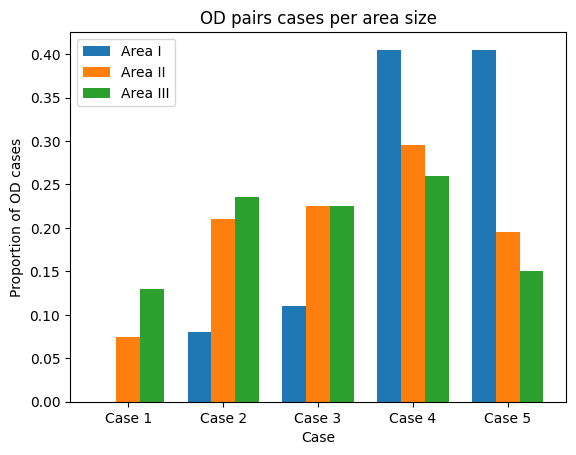

In [ ]:
# Function to calculate proportions and fill missing cases
def calculate_proportions(df, case_column):
    case_counts = df[case_column].value_counts(normalize=True).sort_index()
    # Fill missing cases with zeros
    for i in range(1, 6):
        if i not in case_counts:
            case_counts[i] = 0
    return case_counts.sort_index()

# Define columns for each area
case_columns = ['Area 1_case', 'Area 2_case', 'Area 3_case']

# Calculate proportions for each area
props_1 = calculate_proportions(trips_df, case_columns[0])
props_2 = calculate_proportions(trips_df, case_columns[1])
props_3 = calculate_proportions(trips_df, case_columns[2])

# Print distribution of cases
print("Distribution of cases for:")
print(props_1)
print("Distribution of cases for:")
print(props_2)
print("Distribution of cases for:")
print(props_3)

# Create the plot
fig, ax = plt.subplots()
index = np.arange(1, 6)  # Case numbers
bar_width = 0.25

rects1 = ax.bar(index, props_1, bar_width, label='Area I')
rects2 = ax.bar(index + bar_width, props_2, bar_width, label='Area II')
rects3 = ax.bar(index + 2 * bar_width, props_3, bar_width, label='Area III')

ax.set_xlabel('Case')
ax.set_ylabel('Proportion of OD cases')
ax.set_title('OD pairs cases per area size')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5'])
ax.legend()

# Display the plot
plt.show()

In [ ]:
# Function to randomly assign time of day, vehicle category, and Euro class to each trip
def assign_random_values(trip):
    trip['time'] = np.random.choice(traffic_distribution_df['time'], p=traffic_distribution_df['probability'])
    trip['vehicle_category'] = np.random.choice(vehicle_categories_df['category'], p=vehicle_categories_df['probability'])
    vehicle_type = 'Passenger car Slovakia' if 'passenger' in trip['vehicle_category'] else 'CV Slovakia' if 'Commercial' in trip['vehicle_category'] else 'Motorcycle Slovakia'
    euro_probabilities = euro_classes_df.loc[vehicle_type]
    trip['euro_class'] = np.random.choice(euro_probabilities.index, p=euro_probabilities.values)
    return trip

# Apply the function to the DataFrame with trips
trips_df = trips_df.apply(assign_random_values, axis=1)

# Save the DataFrame to a CSV file
trips_df.to_csv('trips_data_with_random_values.csv', index=False)

In [ ]:
trips_df.head(2)

,origin,destination,distance_km,Area 1_case,Area 2_case,Area 3_case
0,"(16, 12)","(17, 4)",8.062,5,5,2
1,"(19, 9)","(2, 14)",17.720,4,4,4


# **Adding variables**

In [ ]:
# DataFrame trips_df 0 1
trips_df['time2'] = trips_df['time'].str.split('-').str[0].str.split(':').str[0].astype(int)
trips_df['A_Case_1_5'] = (trips_df['Area 1_case'] == 5).astype(int)
trips_df['A_Case_2_5'] = (trips_df['Area 2_case'] == 5).astype(int)
trips_df['A_Case_3_5'] = (trips_df['Area 3_case'] == 5).astype(int)
trips_df['Diesel'] = trips_df['vehicle_category'].isin(['Diesel passenger cars', 'Commercial Vehicles (diesel)']).astype(int)
trips_df['Lux'] = ((trips_df['vehicle_category'].isin(['Petrol passenger cars']) & (trips_df['euro_class'] == '6')) |
                     (trips_df['vehicle_category'] == 'Motorcycles (petrol)') & (trips_df['euro_class'] == '3')).astype(int)

# Let's add the time period check columns 'period1' and 'period2' to the DataFrames
def add_time_period_checks(trips_df):
    # Adding 'period1' for the time period from 7AM to 7PM
    trips_df['period1'] = ((trips_df['time2'] >= 7) & (trips_df['time2'] <= 19)).astype(int)

    # Adding 'period2' for peak hours from 7AM to 10AM and from 4PM to 7PM
    trips_df['period2'] = (((trips_df['time2'] >= 7) & (trips_df['time2'] <= 10)) | ((trips_df['time2'] >= 16) & (trips_df['time2'] <= 19))).astype(int)

# Apply the function to each DataFrame
add_time_period_checks(trips_df)

KeyError: 'time'

In [ ]:
# Applying the restriction rules to each DataFrame
for df in [trips_df]:
    trips_df['1_RR1'] = (trips_df['A_Case_1_5'] == 0).astype(int)
    trips_df['1_RR2'] = ((trips_df['A_Case_1_5'] == 0) & (trips_df['Lux'] == 0)).astype(int)
    trips_df['1_RR3'] = ((trips_df['A_Case_1_5'] == 0) & (trips_df['Diesel'] == 1)).astype(int)
    trips_df['1_RR4'] = ((trips_df['A_Case_1_5'] == 0) & (trips_df['period1'] == 1)).astype(int)
    trips_df['1_RR5'] = ((trips_df['A_Case_1_5'] == 0) & (trips_df['Lux'] == 0) & (trips_df['period1'] == 1)).astype(int)
    trips_df['1_RR6'] = ((trips_df['A_Case_1_5'] == 0) & (trips_df['Diesel'] == 1) & (trips_df['period1'] == 1)).astype(int)
    trips_df['1_RR7'] = ((trips_df['A_Case_1_5'] == 0) & (trips_df['period2'] == 1)).astype(int)
    trips_df['1_RR8'] = ((trips_df['A_Case_1_5'] == 0) & (trips_df['Lux'] == 0) & (trips_df['period2'] == 1)).astype(int)
    trips_df['1_RR9'] = ((trips_df['A_Case_1_5'] == 0) & (trips_df['Diesel'] == 1) & (trips_df['period2'] == 1)).astype(int)

    trips_df['2_RR1'] = (trips_df['A_Case_2_5'] == 0).astype(int)
    trips_df['2_RR2'] = ((trips_df['A_Case_2_5'] == 0) & (trips_df['Lux'] == 0)).astype(int)
    trips_df['2_RR3'] = ((trips_df['A_Case_2_5'] == 0) & (trips_df['Diesel'] == 1)).astype(int)
    trips_df['2_RR4'] = ((trips_df['A_Case_2_5'] == 0) & (trips_df['period1'] == 1)).astype(int)
    trips_df['2_RR5'] = ((trips_df['A_Case_2_5'] == 0) & (trips_df['Lux'] == 0) & (trips_df['period1'] == 1)).astype(int)
    trips_df['2_RR6'] = ((trips_df['A_Case_2_5'] == 0) & (trips_df['Diesel'] == 1) & (trips_df['period1'] == 1)).astype(int)
    trips_df['2_RR7'] = ((trips_df['A_Case_2_5'] == 0) & (trips_df['period2'] == 1)).astype(int)
    trips_df['2_RR8'] = ((trips_df['A_Case_2_5'] == 0) & (trips_df['Lux'] == 0) & (trips_df['period2'] == 1)).astype(int)
    trips_df['2_RR9'] = ((trips_df['A_Case_2_5'] == 0) & (trips_df['Diesel'] == 1) & (trips_df['period2'] == 1)).astype(int)

    trips_df['3_RR1'] = (trips_df['A_Case_3_5'] == 0).astype(int)
    trips_df['3_RR2'] = ((trips_df['A_Case_3_5'] == 0) & (trips_df['Lux'] == 0)).astype(int)
    trips_df['3_RR3'] = ((trips_df['A_Case_3_5'] == 0) & (trips_df['Diesel'] == 1)).astype(int)
    trips_df['3_RR4'] = ((trips_df['A_Case_3_5'] == 0) & (trips_df['period1'] == 1)).astype(int)
    trips_df['3_RR5'] = ((trips_df['A_Case_3_5'] == 0) & (trips_df['Lux'] == 0) & (trips_df['period1'] == 1)).astype(int)
    trips_df['3_RR6'] = ((trips_df['A_Case_3_5'] == 0) & (trips_df['Diesel'] == 1) & (trips_df['period1'] == 1)).astype(int)
    trips_df['3_RR7'] = ((trips_df['A_Case_3_5'] == 0) & (trips_df['period2'] == 1)).astype(int)
    trips_df['3_RR8'] = ((trips_df['A_Case_3_5'] == 0) & (trips_df['Lux'] == 0) & (trips_df['period2'] == 1)).astype(int)
    trips_df['3_RR9'] = ((trips_df['A_Case_3_5'] == 0) & (trips_df['Diesel'] == 1) & (trips_df['period2'] == 1)).astype(int)

KeyError: 'A_Case_1_5'

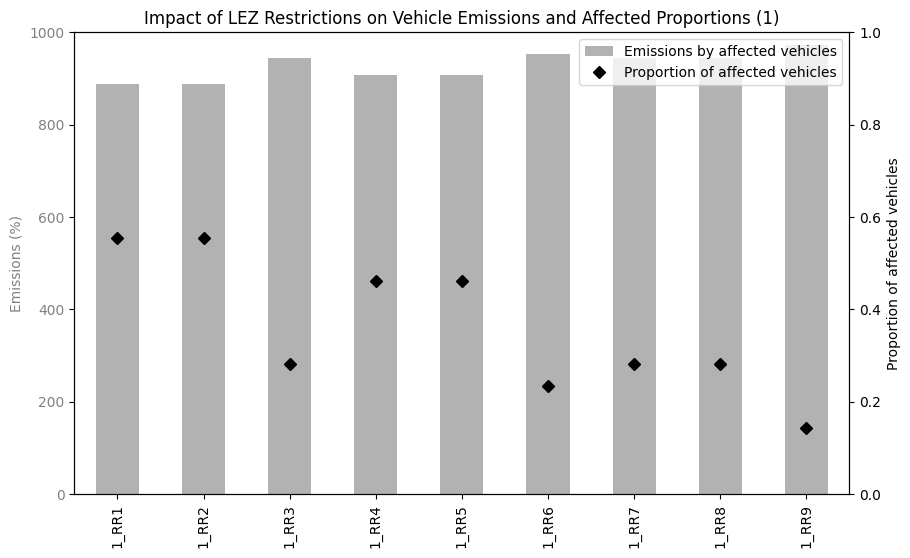

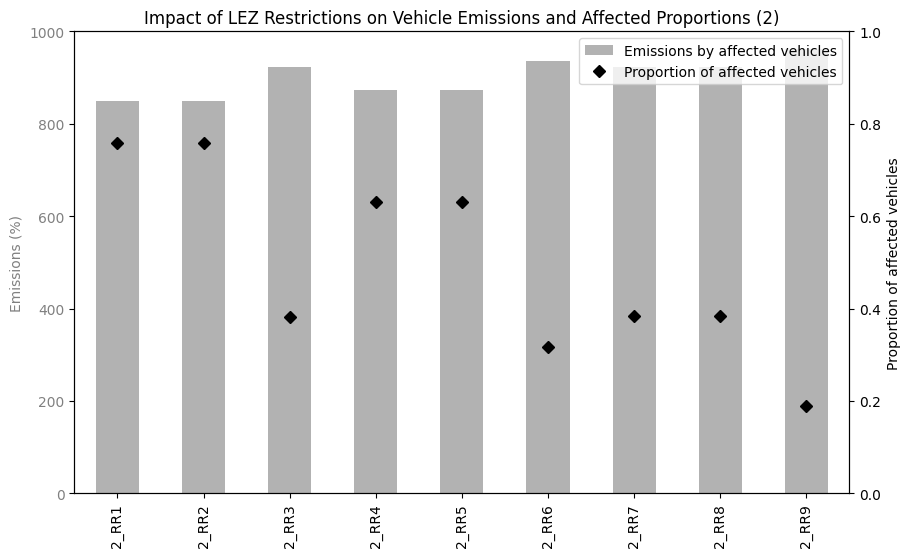

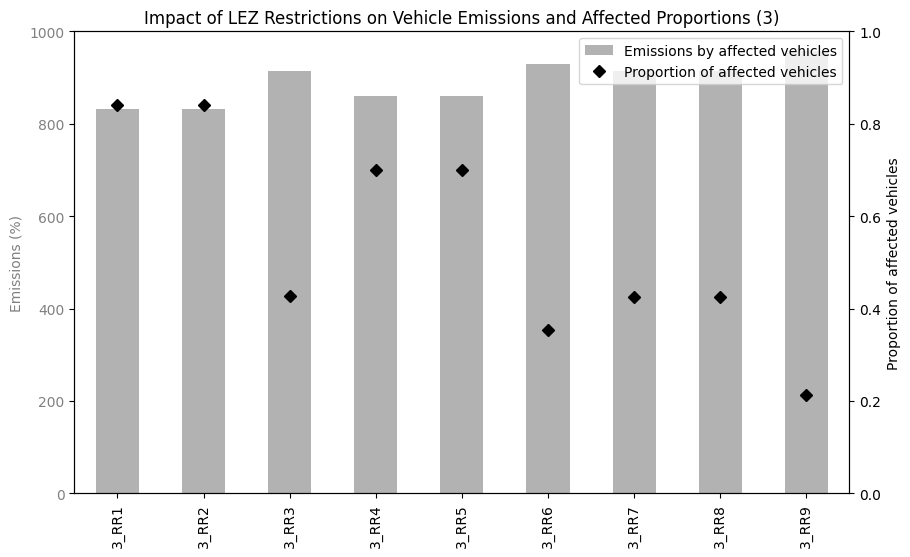

In [ ]:
# Function to create plot for a specific area
def create_plot(area_prefix, df):
    restriction_rules = [f'{area_prefix}_RR{i}' for i in range(1, 10)]
    proportion_affected = df[restriction_rules].mean()  # Assuming 0 or 1 encoding

    # Simulating emissions reduction: say, 20% reduction if affected
    emissions_if_no_LEZ = 1000  # hypothetical total emissions if no LEZ restrictions
    emissions_reduction_factor = 0.2  # 20% reduction in emissions if affected

    # Calculate estimated emissions by affected vehicles
    emissions_by_affected = emissions_if_no_LEZ * (1 - proportion_affected * emissions_reduction_factor)

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for emissions
    emissions_by_affected.plot(kind='bar', color='gray', alpha=0.6, ax=ax1, label='Emissions by affected vehicles')
    ax1.set_ylabel('Emissions (%)', color='gray')
    ax1.tick_params(axis='y', labelcolor='gray')
    ax1.set_ylim(0, emissions_if_no_LEZ)

    # Adding diamonds for proportion affected
    ax2 = ax1.twinx()
    ax2.plot(proportion_affected.index, proportion_affected, 'D', color='black', label='Proportion of affected vehicles')
    ax2.set_ylabel('Proportion of affected vehicles', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.set_ylim(0, 1)

    # Adding legends
    fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.title(f'Impact of LEZ Restrictions on Vehicle Emissions and Affected Proportions ({area_prefix})')
    plt.show()

# Create plots for each area
areas = ['1', '2', '3']
for area in areas:
    create_plot(area, trips_df)

# **Emission**

In [ ]:
# Merge trips_df with traffic_distribution_df to get average speed based on start time
trips_df = trips_df.merge(traffic_distribution_df[['hour', 'average_speed1', 'average_speed2']], left_on='time2', right_on='hour', how='left', suffixes=('_trip', '_traffic'))

# Function to calculate total travel duration
def calculate_duration(distance_km, time2, traffic_distribution_df):
    remaining_distance = distance_km
    duration_minutes = 0
    current_hour = time2

    while remaining_distance > 0:
        avg_speed1 = traffic_distribution_df.loc[traffic_distribution_df['hour'] == current_hour, 'average_speed1'].values[0]
        avg_speed2 = traffic_distribution_df.loc[traffic_distribution_df['hour'] == current_hour, 'average_speed2'].values[0]

        if remaining_distance <= avg_speed1:
            duration_minutes += (remaining_distance / avg_speed1) * 60
            break
        else:
            duration_minutes += 60  # first hour
            remaining_distance -= avg_speed1

        if remaining_distance <= avg_speed2:
            duration_minutes += (remaining_distance / avg_speed2) * 60
            break
        else:
            duration_minutes += 60  # next hour
            remaining_distance -= avg_speed2

        current_hour = (current_hour + 1) % 24  # move to the next hour

    return round(duration_minutes)

# Apply function to calculate duration for each trip
trips_df['total_duration'] = trips_df.apply(lambda x: calculate_duration(x['distance_km'], x['time2'], traffic_distribution_df), axis=1)

In [ ]:
trips_df.head(5)

,origin,destination,distance_km,Area 1_case,Area 2_case,Area 3_case,time,vehicle_category,euro_class,time2,...,3_RR4,3_RR5,3_RR6,3_RR7,3_RR8,3_RR9,hour,average_speed1,average_speed2,total_duration
0,"(6, 16)","(19, 2)",19.105,4,4,2,07:00-07:59,Petrol passenger cars,Euro 2,7,...,1,1,0,1,1,0,7,10.00,10.00,115
1,"(15, 18)","(15, 20)",2.000,5,5,5,21:00-21:59,Petrol passenger cars,Euro 2,21,...,0,0,0,0,0,0,21,35.71,38.31,3
2,"(1, 9)","(7, 3)",8.485,5,4,4,09:00-09:59,Petrol passenger cars,Euro 2,9,...,1,1,0,1,1,0,9,11.04,12.99,46
3,"(1, 2)","(2, 7)",5.099,5,5,5,09:00-09:59,Diesel passenger cars,Euro 4,9,...,0,0,0,0,0,0,9,11.04,12.99,28
4,"(19, 13)","(9, 10)",10.440,3,3,3,18:00-18:59,Petrol passenger cars,Euro 1,18,...,1,1,0,1,1,0,18,11.04,22.73,57


In [ ]:
# Calculate additional variables based on duration
trips_df['duration1'] = trips_df['total_duration'].apply(lambda x: min(60, x))
trips_df['duration2'] = trips_df['total_duration'].apply(lambda x: x - 60 if x > 60 else 0)
trips_df['second_hour_minutes'] = trips_df['total_duration'] - 60
trips_df['second_hour_minutes'] = trips_df['second_hour_minutes'].apply(lambda x: max(0, x))

# Calculate distances traveled during the first and second hours with three decimal places
trips_df['first_hour_distance'] = (trips_df['average_speed1'] * (trips_df['duration1'] / 60)).apply(lambda x: round(x, 3))
trips_df['second_hour_distance'] = (trips_df['average_speed2'] * (trips_df['duration2'] / 60)).apply(lambda x: round(x, 3))

In [ ]:
# NOx emission factors for petrol cars and minibuses <2.5 tonnes GVW with 1400-2000 engine capacity.
petrol_cars_emission_factors = {
    'Euro 1': {'K': 1.00, 'a': 2.37, 'b': 0.199, 'c': 0.000647, 'd': 3.22e-06, 'e': 0, 'f': 0, 'g': 0},
    'Euro 2': {'K': 1.00, 'a': 1.10, 'b': 0.120, 'c': 0.000613, 'd': 1.17e-06, 'e': 8.78e-09, 'f': 0, 'g': 0},
    'Euro 3': {'K': 1.00, 'a': 0.437, 'b': 0.0614, 'c': 8.02e-05, 'd': 8.83e-08, 'e': 0, 'f': 0, 'g': 0},
    'Euro 4': {'K': 1.00, 'a': 0.517, 'b': 0.0345, 'c': 5.49e-05, 'd': 4.08e-07, 'e': 0, 'f': 0, 'g': 0},
    'Euro 5': {'K': 0.594, 'a': 0.517, 'b': 0.0345, 'c': 5.49e-05, 'd': 4.08e-07, 'e': 0, 'f': 0, 'g': 0},
    'Euro 6': {'K': 0.594, 'a': 0.517, 'b': 0.0345, 'c': 5.49e-05, 'd': 4.08e-07, 'e': 0, 'f': 0, 'g': 0}
}

# NOx emission factors for diesel cars and minibuses <2.5 tonnes GVW with 1400-2000 engine capacity.
diesel_cars_emission_factors = {
    'Euro 1': {'K': 1.00, 'a': 11.2, 'b': 0.158, 'c': 0.00124, 'd': 2.27e-05, 'e': -8.30e-08, 'f': 1.09e-09, 'g': 0},
    'Euro 2': {'K': 1.00, 'a': 14.8, 'b': 0.177, 'c': -0.0003, 'd': 6.43e-05, 'e': -4.62e-07, 'f': 2.96e-09, 'g': 0},
    'Euro 3': {'K': 1.00, 'a': 9.29, 'b': 0.168, 'c': 0.00118, 'd': 1.50e-05, 'e': -3.75e-08, 'f': 4.97e-10, 'g': 0},
    'Euro 4': {'K': 1.00, 'a': 5.49, 'b': 0.123, 'c': 0.000671, 'd': 2.08e-05, 'e': -9.97e-08, 'f': 8.50e-10, 'g': 0},
    'Euro 5': {'K': 0.675, 'a': 5.49, 'b': 0.123, 'c': 0.000671, 'd': 2.08e-05, 'e': -9.97e-08, 'f': 8.50e-10, 'g': 0},
    'Euro 6': {'K': 0.3, 'a': 5.49, 'b': 0.123, 'c': 0.000671, 'd': 2.08e-05, 'e': -9.97e-08, 'f': 8.50e-10, 'g': 0}
}

# Function to calculate emissions
def calculate_emissions(euro_class, speed, vehicle_category):
    if vehicle_category in ['Petrol passenger cars', 'Motorcycles (petrol)']:
        factors = petrol_cars_emission_factors.get(euro_class, None)
    elif vehicle_category in ['Diesel passenger cars', 'Commercial Vehicles (diesel)']:
        factors = diesel_cars_emission_factors.get(euro_class, None)
    else:
        return 0  # Default to 0 if vehicle category is not recognized

    if factors is None:
        return 0  # Default to 0 if euro_class is not found

    # Calculate emission using polynomial formula
    emissions = (factors['K'] * (factors['a'] + factors['b'] * speed**2 + factors['c'] * speed**3 +
                                 factors['d'] * speed**4 + factors['e'] * speed**5 +
                                 factors['f'] * speed**6)) / speed
    return emissions

# Calculate emissions for each trip
def calculate_trip_emissions(trip):
    # Calculate emissions for the first hour
    emissions_first_hour = calculate_emissions(trip['euro_class'], trip['average_speed1'], trip['vehicle_category']) * trip['first_hour_distance']

    # Calculate emissions for the second hour, if applicable
    if trip['duration2'] > 0:
        emissions_second_hour = calculate_emissions(trip['euro_class'], trip['average_speed2'], trip['vehicle_category']) * trip['second_hour_distance']
    else:
        emissions_second_hour = 0

    # Total emissions
    trip['total_emissions'] = emissions_first_hour + emissions_second_hour

    return trip

# Ensure necessary columns exist in the DataFrame
required_columns = ['euro_class', 'average_speed1', 'average_speed2', 'vehicle_category', 'first_hour_distance', 'second_hour_distance', 'duration2']
for column in required_columns:
    if column not in trips_df.columns:
        raise KeyError(f"Column '{column}' not found in the DataFrame.")

# Apply the emissions calculation to each trip
trips_df = trips_df.apply(calculate_trip_emissions, axis=1)

In [ ]:
# Calculate basic statistics for total_emissions
total_emissions_stats = trips_df['total_emissions'].describe()

# Print the statistics
print(total_emissions_stats)

count    5000.000000
mean       28.135275
std        29.582576
min         0.000000
25%         8.528868
50%        19.679856
75%        37.654347
max       335.006245
Name: total_emissions, dtype: float64


In [ ]:
# Function to calculate the reduced emissions after applying a restriction
def calculate_reduced_emissions(trip, rule_column):
    if trip[rule_column] == 1:
        # If the restriction applies, emissions are reduced to 0
        return 0
    else:
        # If the restriction does not apply, emissions remain the same
        return trip['total_emissions']

# Apply the restriction rules to each DataFrame
restriction_columns = [f'{i}_RR{j}' for i in range(1, 4) for j in range(1, 10)]
for col in restriction_columns:
    trips_df[f'reduced_emissions_{col}'] = trips_df.apply(lambda x: calculate_reduced_emissions(x, col), axis=1)

# Calculate the total reduction in emissions for each restriction rule
for col in restriction_columns:
    trips_df[f'emission_reduction_{col}'] = trips_df['total_emissions'] - trips_df[f'reduced_emissions_{col}']

# Display the updated DataFrame with emission reductions
print(trips_df[[f'reduced_emissions_{col}' for col in restriction_columns] + [f'emission_reduction_{col}' for col in restriction_columns]])


      reduced_emissions_1_RR1  reduced_emissions_1_RR2  \
0                    0.000000                 0.000000   
1                    9.225155                 9.225155   
2                   12.703244                12.703244   
3                   10.116629                10.116629   
4                    0.000000                 0.000000   
...                       ...                      ...   
4995                 0.000000                 0.000000   
4996                 0.000000                 0.000000   
4997                30.687076                30.687076   
4998                 0.000000                 0.000000   
4999                 0.000000                 0.000000   

      reduced_emissions_1_RR3  reduced_emissions_1_RR4  \
0                   26.307815                 0.000000   
1                    9.225155                 9.225155   
2                   12.703244                12.703244   
3                   10.116629                10.116629   
4            

<ipython-input-17-43aa0e0f2277>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df[f'emission_reduction_{col}'] = trips_df['total_emissions'] - trips_df[f'reduced_emissions_{col}']
<ipython-input-17-43aa0e0f2277>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df[f'emission_reduction_{col}'] = trips_df['total_emissions'] - trips_df[f'reduced_emissions_{col}']
<ipython-input-17-43aa0e0f2277>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

In [ ]:
# Function to add time period checks
def add_time_period_checks(trips_df):
    # Adding 'period1' for the time period from 7AM to 7PM
    trips_df['period1'] = ((trips_df['time2'] >= 7) & (trips_df['time2'] <= 19)).astype(int)

    # Adding 'period2' for peak hours from 7AM to 10AM and from 4PM to 7PM
    trips_df['period2'] = (((trips_df['time2'] >= 7) & (trips_df['time2'] <= 10)) | ((trips_df['time2'] >= 16) & (trips_df['time2'] <= 19))).astype(int)

# Apply the function to the DataFrame
add_time_period_checks(trips_df)

# Function to determine the remaining time until restrictions end
def time_until_restriction_ends(row):
    remaining_time_period1 = float('inf')
    remaining_time_period2 = float('inf')

    if row['period1'] == 1:
        remaining_time_period1 = 19 - row['time2']

    if row['period2'] == 1:
        if row['time2'] <= 10:
            remaining_time_period2 = 10 - row['time2']
        elif row['time2'] >= 16:
            remaining_time_period2 = 19 - row['time2']

    return min(remaining_time_period1, remaining_time_period2)

# Apply the function to the DataFrame to calculate the time until restrictions end
trips_df['time_until_restriction_ends'] = trips_df.apply(time_until_restriction_ends, axis=1)

# Define category Cat3: vehicles that can start moving after restrictions end within 120 minutes
trips_df['Cat3'] = (trips_df['time_until_restriction_ends'] <= 2).astype(int)

# Print the updated DataFrame
print(trips_df[['time2', 'period1', 'period2', 'time_until_restriction_ends', 'Cat3']])

# Save the updated DataFrame to a CSV file
trips_df.to_csv('trips_data_with_restriction_times.csv', index=False)

# Show the number of vehicles in category Cat3
print(f"Count of vehicles in Cat3: {trips_df['Cat3'].sum()}")

<ipython-input-18-018fc3455128>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['time_until_restriction_ends'] = trips_df.apply(time_until_restriction_ends, axis=1)
<ipython-input-18-018fc3455128>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['Cat3'] = (trips_df['time_until_restriction_ends'] <= 2).astype(int)


      time2  period1  period2  time_until_restriction_ends  Cat3
0         7        1        1                          3.0     0
1        21        0        0                          inf     0
2         9        1        1                          1.0     1
3         9        1        1                          1.0     1
4        18        1        1                          1.0     1
...     ...      ...      ...                          ...   ...
4995     21        0        0                          inf     0
4996     11        1        0                          8.0     0
4997     22        0        0                          inf     0
4998     11        1        0                          8.0     0
4999      7        1        1                          3.0     0

[5000 rows x 5 columns]
Count of vehicles in Cat3: 1807


In [ ]:
# Define Category 2 vehicles for each area
def determine_cat2(df, area_prefix):
    # Combine the restriction rules to determine if the vehicle should be in Category 2
    restriction_columns = [f'{area_prefix}_RR{i}' for i in range(1, 10)]
    df[f'Cat2_{area_prefix}'] = df[restriction_columns].max(axis=1) * (df['Cat3'] == 0)
    return df

# Apply the function to determine Category 2 vehicles for each area
trips_df = determine_cat2(trips_df, '1')
trips_df = determine_cat2(trips_df, '2')
trips_df = determine_cat2(trips_df, '3')

# Display the updated DataFrame to verify the new columns
print(trips_df[['1_RR1', '1_RR2', '1_RR3', '1_RR4', '1_RR5', '1_RR6', '1_RR7', '1_RR8', '1_RR9', 'Cat2_1']])
print(trips_df[['2_RR1', '2_RR2', '2_RR3', '2_RR4', '2_RR5', '2_RR6', '2_RR7', '2_RR8', '2_RR9', 'Cat2_2']])
print(trips_df[['3_RR1', '3_RR2', '3_RR3', '3_RR4', '3_RR5', '3_RR6', '3_RR7', '3_RR8', '3_RR9', 'Cat2_3']])

# Save the updated DataFrame to a CSV file
trips_df.to_csv('trips_data_with_Cat2.csv', index=False)

# Show the number of vehicles in each Cat2 category
print(f"Count of vehicles in Cat2_Area1: {trips_df['Cat2_1'].sum()}")
print(f"Count of vehicles in Cat2_Area2: {trips_df['Cat2_2'].sum()}")
print(f"Count of vehicles in Cat2_Area3: {trips_df['Cat2_3'].sum()}")


<ipython-input-19-6f6b84c3eaf6>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Cat2_{area_prefix}'] = df[restriction_columns].max(axis=1) * (df['Cat3'] == 0)
<ipython-input-19-6f6b84c3eaf6>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Cat2_{area_prefix}'] = df[restriction_columns].max(axis=1) * (df['Cat3'] == 0)
<ipython-input-19-6f6b84c3eaf6>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

      1_RR1  1_RR2  1_RR3  1_RR4  1_RR5  1_RR6  1_RR7  1_RR8  1_RR9  Cat2_1
0         1      1      0      1      1      0      1      1      0       1
1         0      0      0      0      0      0      0      0      0       0
2         0      0      0      0      0      0      0      0      0       0
3         0      0      0      0      0      0      0      0      0       0
4         1      1      0      1      1      0      1      1      0       0
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...
4995      1      1      1      0      0      0      0      0      0       1
4996      1      1      1      1      1      1      0      0      0       1
4997      0      0      0      0      0      0      0      0      0       0
4998      1      1      0      1      1      0      0      0      0       1
4999      1      1      0      1      1      0      1      1      0       1

[5000 rows x 10 columns]
      2_RR1  2_RR2  2_RR3  2_RR4  2_RR5  2_RR6  2_RR7  2_RR8  

In [ ]:
# Create three new dichotomous variables for each LEZ area indicating if a vehicle falls into case 5
trips_df['Cat1_Area1'] = (trips_df['Area 1_case'] == 5).astype(int)
trips_df['Cat1_Area2'] = (trips_df['Area 2_case'] == 5).astype(int)
trips_df['Cat1_Area3'] = (trips_df['Area 3_case'] == 5).astype(int)

# Display the updated DataFrame to verify the new columns
print(trips_df[['Area 1_case', 'Area 2_case', 'Area 3_case', 'Cat1_Area1', 'Cat1_Area2', 'Cat1_Area3']])

# Save the updated DataFrame to a CSV file
trips_df.to_csv('trips_data_with_Cat1.csv', index=False)

# Show the number of vehicles in each Cat1 category
print(f"Count of vehicles in Cat1_Area1: {trips_df['Cat1_Area1'].sum()}")
print(f"Count of vehicles in Cat1_Area2: {trips_df['Cat1_Area2'].sum()}")
print(f"Count of vehicles in Cat1_Area3: {trips_df['Cat1_Area3'].sum()}")

<ipython-input-20-e00f4073f746>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['Cat1_Area1'] = (trips_df['Area 1_case'] == 5).astype(int)
<ipython-input-20-e00f4073f746>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['Cat1_Area2'] = (trips_df['Area 2_case'] == 5).astype(int)
<ipython-input-20-e00f4073f746>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

      Area 1_case  Area 2_case  Area 3_case  Cat1_Area1  Cat1_Area2  \
0               4            4            2           0           0   
1               5            5            5           1           1   
2               5            4            4           1           0   
3               5            5            5           1           1   
4               3            3            3           0           0   
...           ...          ...          ...         ...         ...   
4995            4            4            4           0           0   
4996            2            2            2           0           0   
4997            5            5            2           1           1   
4998            4            4            4           0           0   
4999            3            1            1           0           0   

      Cat1_Area3  
0              0  
1              1  
2              0  
3              1  
4              0  
...          ...  
4995          

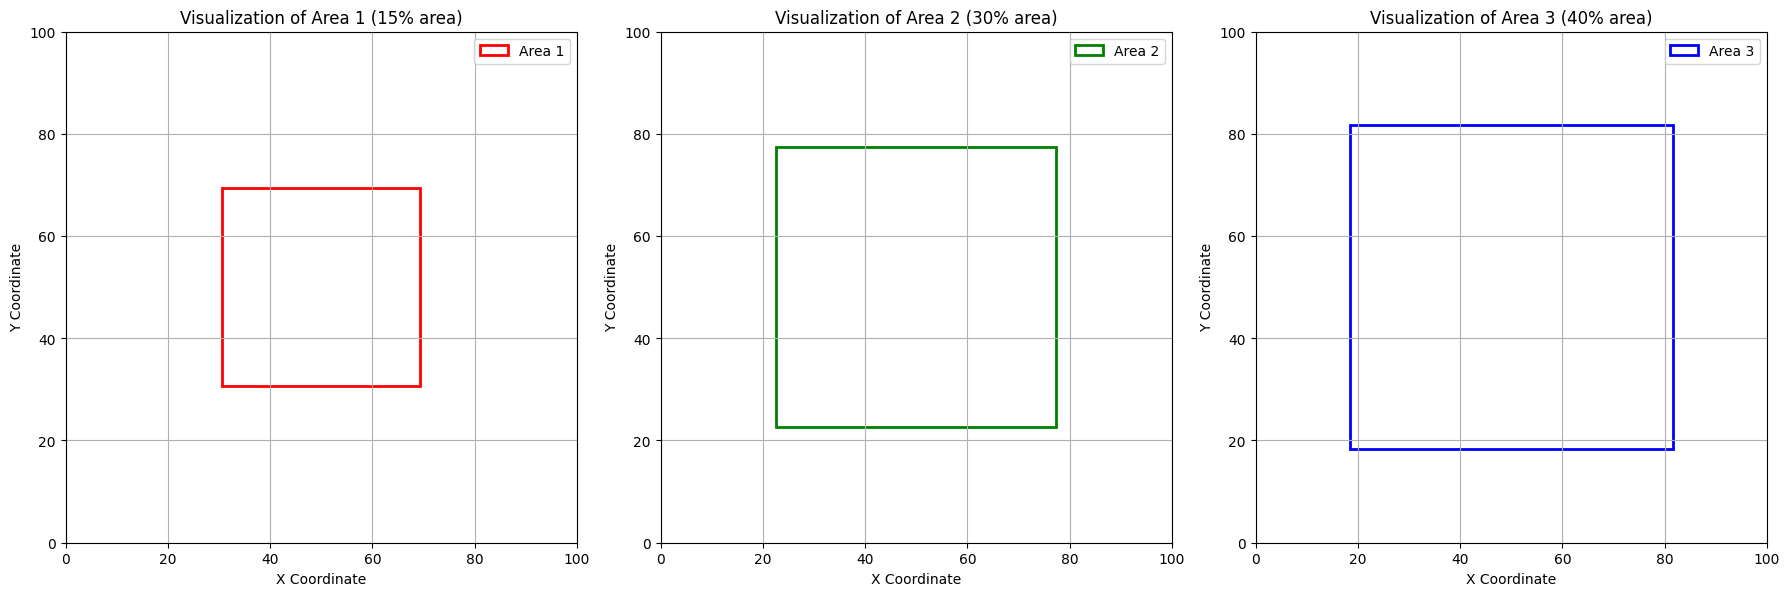

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the sizes and colors of the zones as percentages of 100x100 space
lez_sizes = {'Area 1': 15, 'Area 2': 30, 'Area 3': 40}
colors = {'Area 1': 'red', 'Area 2': 'green', 'Area 3': 'blue'}

# Calculate the actual sizes in the 100x100 space
lez_actual_sizes = {key: (value / 100) ** 0.5 * 100 for key, value in lez_sizes.items()}

# Create a figure and axes for each LEZ area
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (area_name, lez_size) in enumerate(lez_actual_sizes.items()):
    ax = axes[i]

    # Define the center of the space
    center = 50
    half_size = lez_size / 2  # Convert percentage to actual size

    # Add a square representing the LEZ area
    rect = patches.Rectangle((center - half_size, center - half_size), lez_size, lez_size, linewidth=2, edgecolor=colors[area_name], facecolor='none', label=area_name)
    ax.add_patch(rect)

    # Set limits and labels
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Visualization of {area_name} ({lez_sizes[area_name]}% area)')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Define the delay for Category 3 vehicles (1 or 2 hours)
def calculate_delay(row):
    if row['Cat3'] == 1:
        return row['time_until_restriction_ends']
    return 0

trips_df['departure_delay'] = trips_df.apply(calculate_delay, axis=1)

# Adjust the start time based on the delay
trips_df['new_time2'] = trips_df['time2'] + trips_df['departure_delay']
trips_df['new_time2'] = trips_df['new_time2'] % 24  # Ensure time stays within 0-23 range

# Merge trips_df with traffic_distribution_df to get new average speeds based on the adjusted start time
trips_df = trips_df.merge(traffic_distribution_df[['hour', 'average_speed1', 'average_speed2']], left_on='new_time2', right_on='hour', how='left', suffixes=('_original', '_new'))

# Ensure 'average_speed' columns exist and have no zero values
trips_df['average_speed1_new'].replace(0, 1e-3, inplace=True)
trips_df['average_speed2_new'].replace(0, 1e-3, inplace=True)


<ipython-input-22-099c37cf2bce>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['departure_delay'] = trips_df.apply(calculate_delay, axis=1)
<ipython-input-22-099c37cf2bce>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['new_time2'] = trips_df['time2'] + trips_df['departure_delay']


In [ ]:
# Recalculate emissions for Category 3 vehicles using the new departure time and average speeds
def recalculate_trip_emissions(trip):
    # Calculate emissions for the first hour using new average speeds if in Category 3
    if trip['Cat3'] == 1:
        avg_speed1 = trip['average_speed1_new']
        avg_speed2 = trip['average_speed2_new']
    else:
        avg_speed1 = trip['average_speed1_original']
        avg_speed2 = trip['average_speed2_original']

    emissions_first_hour = calculate_emissions(trip['euro_class'], avg_speed1, trip['vehicle_category']) * trip['first_hour_distance']

    # Calculate emissions for the second hour, if applicable
    if trip['duration2'] > 0:
        emissions_second_hour = calculate_emissions(trip['euro_class'], avg_speed2, trip['vehicle_category']) * trip['second_hour_distance']
    else:
        emissions_second_hour = 0

    # Total emissions
    trip['total_emissions_new'] = emissions_first_hour + emissions_second_hour

    return trip

# Apply the emissions recalculation to each trip
trips_df = trips_df.apply(recalculate_trip_emissions, axis=1)

# Display the updated DataFrame with new emissions
print(trips_df[['euro_class', 'average_speed1_new', 'average_speed2_new', 'vehicle_category', 'first_hour_distance', 'second_hour_distance', 'total_emissions_new']])


     euro_class  average_speed1_new  average_speed2_new  \
0        Euro 2               10.00               10.00   
1        Euro 2               35.71               38.31   
2        Euro 2               12.99               11.69   
3        Euro 4               12.99               11.69   
4        Euro 1               22.73               30.52   
...         ...                 ...                 ...   
4995     Euro 3               35.71               38.31   
4996     Euro 6               11.69               11.04   
4997     Euro 4               38.31               42.86   
4998     Euro 1               11.69               11.04   
4999     Euro 4               10.00               10.00   

           vehicle_category  first_hour_distance  second_hour_distance  \
0     Petrol passenger cars               10.000                 9.167   
1     Petrol passenger cars                1.786                 0.000   
2     Petrol passenger cars                8.464                 0.00

In [ ]:
# Sum of total emissions without restrictions
total_emissions_without_restrictions = trips_df['total_emissions'].sum()
print(f"Total emissions without restrictions: {total_emissions_without_restrictions}")


Total emissions without restrictions: 140676.3759960631


In [ ]:
# Calculate emissions for Category 1 and Category 3 vehicles for each zone
for area_prefix in ['Area 1', 'Area 2', 'Area 3']:
    # Category 1 emissions (no restrictions applied)
    trips_df[f'{area_prefix}_Cat1'] = (trips_df[f'{area_prefix}_case'] != 5).astype(int)
    total_emissions_Cat1 = trips_df.loc[trips_df[f'{area_prefix}_Cat1'] == 1, 'total_emissions'].sum()

    # Category 3 emissions (adjusted for delay)
    total_emissions_Cat3 = trips_df.loc[trips_df[f'Cat3'] == 1, 'total_emissions_new'].sum()

    trips_df[f'{area_prefix}_total_emissions_with_restrictions'] = total_emissions_Cat1 + total_emissions_Cat3

    print(f"Total emissions with restrictions in {area_prefix}: {trips_df[f'{area_prefix}_total_emissions_with_restrictions'].sum()}")

# Overall total emissions with restrictions
total_emissions_with_restrictions = trips_df[['Area 1_total_emissions_with_restrictions', 'Area 2_total_emissions_with_restrictions', 'Area 3_total_emissions_with_restrictions']].sum().sum()
print(f"Total emissions with restrictions: {total_emissions_with_restrictions}")


Total emissions with restrictions in Area 1: 732152832.5264564
Total emissions with restrictions in Area 2: 855032871.849289
Total emissions with restrictions in Area 3: 900296710.6152744
Total emissions with restrictions: 2487482414.9910197


<ipython-input-25-1b0b721ee87b>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df[f'{area_prefix}_Cat1'] = (trips_df[f'{area_prefix}_case'] != 5).astype(int)
<ipython-input-25-1b0b721ee87b>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df[f'{area_prefix}_total_emissions_with_restrictions'] = total_emissions_Cat1 + total_emissions_Cat3
<ipython-input-25-1b0b721ee87b>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

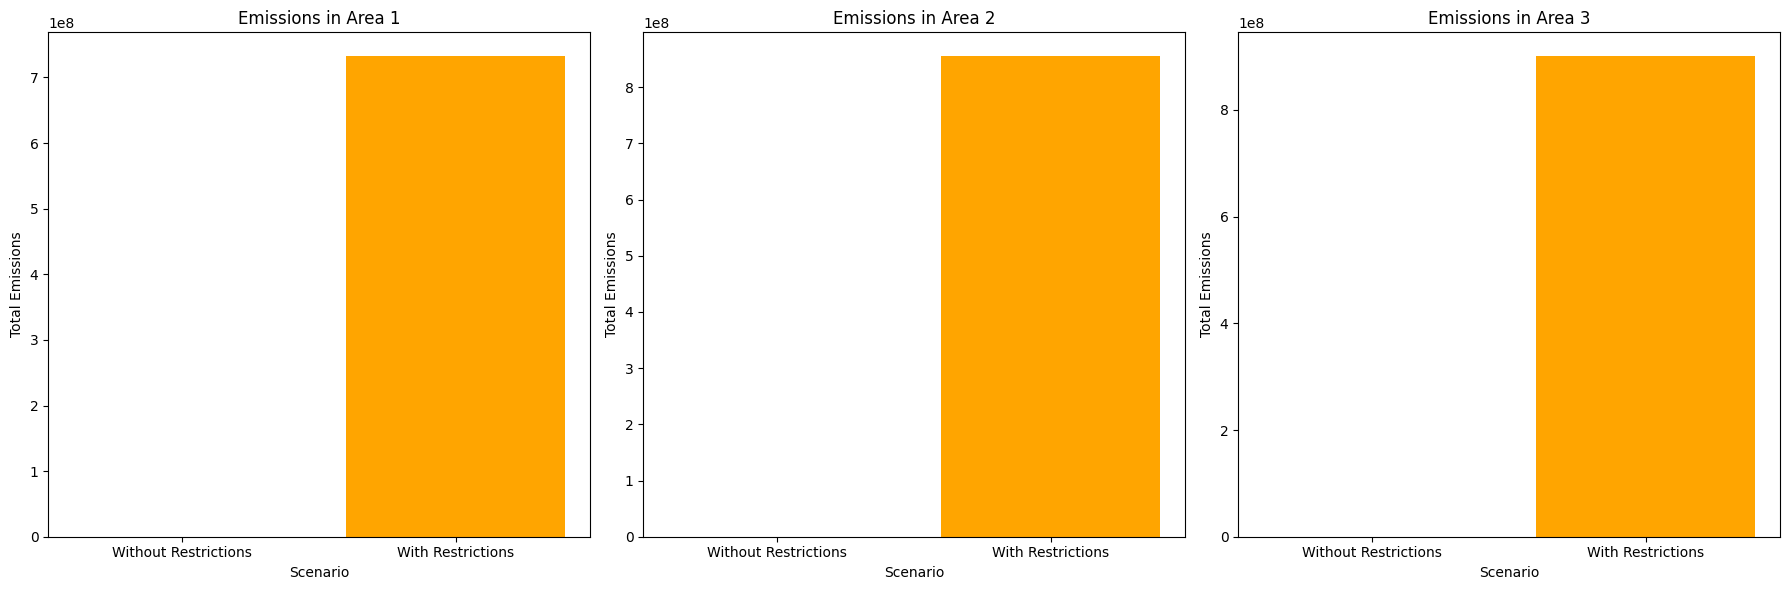

In [ ]:
import matplotlib.pyplot as plt

# Define emissions for each area
emissions_data = {
    'Area 1': {
        'Without Restrictions': total_emissions_without_restrictions,
        'With Restrictions': trips_df['Area 1_total_emissions_with_restrictions'].sum()
    },
    'Area 2': {
        'Without Restrictions': total_emissions_without_restrictions,
        'With Restrictions': trips_df['Area 2_total_emissions_with_restrictions'].sum()
    },
    'Area 3': {
        'Without Restrictions': total_emissions_without_restrictions,
        'With Restrictions': trips_df['Area 3_total_emissions_with_restrictions'].sum()
    }
}

# Create bar plots for each area
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (area, data) in enumerate(emissions_data.items()):
    ax = axes[i]
    ax.bar(data.keys(), data.values(), color=['blue', 'orange'])
    ax.set_title(f'Emissions in {area}')
    ax.set_ylabel('Total Emissions')
    ax.set_xlabel('Scenario')

plt.tight_layout()
plt.show()


In [ ]:
# Category 2 vehicles: those which cannot travel due to restrictions
trips_df['Cat2_Area1'] = ((trips_df['time_until_restriction_ends'] > 2) & (trips_df['Area 1_case'] != 5)).astype(int)
trips_df['Cat2_Area2'] = ((trips_df['time_until_restriction_ends'] > 2) & (trips_df['Area 2_case'] != 5)).astype(int)
trips_df['Cat2_Area3'] = ((trips_df['time_until_restriction_ends'] > 2) & (trips_df['Area 3_case'] != 5)).astype(int)

# Set emissions to zero for Category 2 vehicles
trips_df.loc[trips_df['Cat2_Area1'] == 1, 'total_emissions'] = 0
trips_df.loc[trips_df['Cat2_Area2'] == 1, 'total_emissions'] = 0
trips_df.loc[trips_df['Cat2_Area3'] == 1, 'total_emissions'] = 0


<ipython-input-27-609e2768da21>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['Cat2_Area1'] = ((trips_df['time_until_restriction_ends'] > 2) & (trips_df['Area 1_case'] != 5)).astype(int)
<ipython-input-27-609e2768da21>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['Cat2_Area2'] = ((trips_df['time_until_restriction_ends'] > 2) & (trips_df['Area 2_case'] != 5)).astype(int)
<ipython-input-27-609e2768da21>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

In [ ]:
# Calculate the new start time and update speeds for Category 3 vehicles
def update_trip_with_delay(trip):
    if trip['Cat3'] == 1:
        delay_hours = trip['time_until_restriction_ends']
        new_time2 = (trip['time2'] + delay_hours) % 24
        new_speed1 = traffic_distribution_df.loc[traffic_distribution_df['hour'] == new_time2, 'average_speed1'].values[0]
        new_speed2 = traffic_distribution_df.loc[traffic_distribution_df['hour'] == (new_time2 + 1) % 24, 'average_speed2'].values[0]

        # Recalculate durations and distances
        trip['duration1'] = min(60, trip['total_duration'])
        trip['duration2'] = trip['total_duration'] - trip['duration1']
        trip['first_hour_distance'] = round(new_speed1 * (trip['duration1'] / 60), 3)
        trip['second_hour_distance'] = round(new_speed2 * (trip['duration2'] / 60), 3)

        # Recalculate emissions
        trip['total_emissions_new'] = calculate_emissions(trip['euro_class'], new_speed1, trip['vehicle_category']) * trip['first_hour_distance']
        if trip['duration2'] > 0:
            trip['total_emissions_new'] += calculate_emissions(trip['euro_class'], new_speed2, trip['vehicle_category']) * trip['second_hour_distance']
    else:
        trip['total_emissions_new'] = trip['total_emissions']
    return trip

# Apply the function to update trips
trips_df = trips_df.apply(update_trip_with_delay, axis=1)


In [ ]:
# Calculate emissions for Category 1 and adjusted Category 3 vehicles
def calculate_restricted_emissions(area_prefix):
    total_emissions_Cat1 = trips_df.loc[trips_df[f'{area_prefix}_Cat1'] == 1, 'total_emissions'].sum()
    total_emissions_Cat3 = trips_df.loc[trips_df['Cat3'] == 1, 'total_emissions_new'].sum()
    return total_emissions_Cat1 + total_emissions_Cat3

# Calculate emissions for each area
total_emissions_with_restrictions_Area1 = calculate_restricted_emissions('Area 1')
total_emissions_with_restrictions_Area2 = calculate_restricted_emissions('Area 2')
total_emissions_with_restrictions_Area3 = calculate_restricted_emissions('Area 3')

# Overall total emissions with restrictions
total_emissions_with_restrictions = total_emissions_with_restrictions_Area1 + total_emissions_with_restrictions_Area2 + total_emissions_with_restrictions_Area3

print(f"Total emissions without restrictions: {total_emissions_without_restrictions}")
print(f"Total emissions with restrictions in Area 1: {total_emissions_with_restrictions_Area1}")
print(f"Total emissions with restrictions in Area 2: {total_emissions_with_restrictions_Area2}")
print(f"Total emissions with restrictions in Area 3: {total_emissions_with_restrictions_Area3}")
print(f"Total emissions with restrictions: {total_emissions_with_restrictions}")


Total emissions without restrictions: 140676.3759960631
Total emissions with restrictions in Area 1: 125377.65619153826
Total emissions with restrictions in Area 2: 132080.17740975818
Total emissions with restrictions in Area 3: 134685.70976337584
Total emissions with restrictions: 392143.5433646723


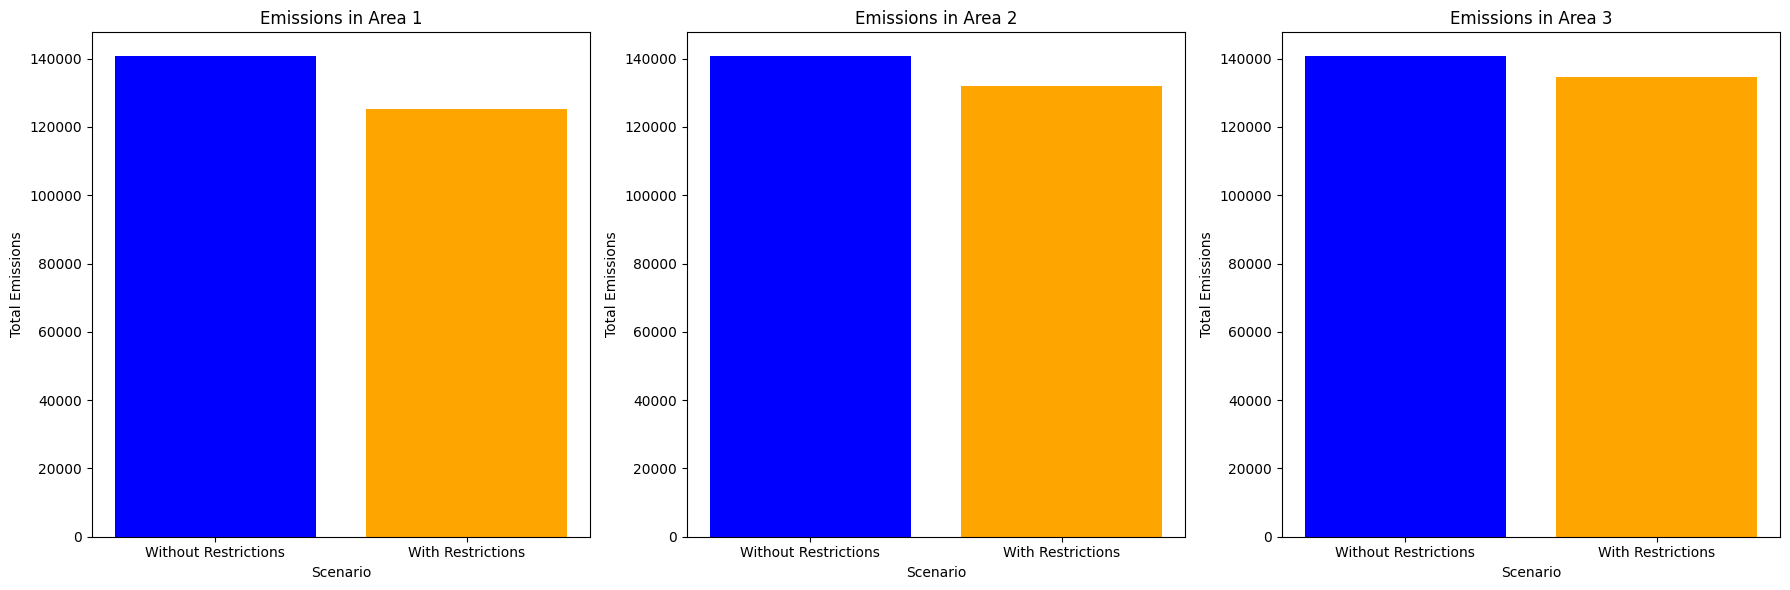

In [ ]:
import matplotlib.pyplot as plt

# Define emissions for each area
emissions_data = {
    'Area 1': {
        'Without Restrictions': total_emissions_without_restrictions,
        'With Restrictions': total_emissions_with_restrictions_Area1
    },
    'Area 2': {
        'Without Restrictions': total_emissions_without_restrictions,
        'With Restrictions': total_emissions_with_restrictions_Area2
    },
    'Area 3': {
        'Without Restrictions': total_emissions_without_restrictions,
        'With Restrictions': total_emissions_with_restrictions_Area3
    }
}

# Create bar plots for each area
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (area, data) in enumerate(emissions_data.items()):
    ax = axes[i]
    ax.bar(data.keys(), data.values(), color=['blue', 'orange'])
    ax.set_title(f'Emissions in {area}')
    ax.set_ylabel('Total Emissions')
    ax.set_xlabel('Scenario')

plt.tight_layout()
plt.show()


In [ ]:
# Create variables for the second category (vehicles that cancel the trip)
trips_df['Cat2_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 0)).astype(int)
trips_df['Cat2_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 0)).astype(int)
trips_df['Cat2_Area3'] = ((trips_df['Cat1_Area3'] == 0) & (trips_df['Cat3'] == 0)).astype(int)

# Create variables for the third category (vehicles that wait and then proceed)
trips_df['Cat3_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
trips_df['Cat3_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
trips_df['Cat3_Area3'] = ((trips_df['Cat1_Area3'] == 0) & (trips_df['Cat3'] == 1)).astype(int)

# Define the categories
categories = {
    'Cat1_Area1': 'Category 1 (Area 1)',
    'Cat1_Area2': 'Category 1 (Area 2)',
    'Cat1_Area3': 'Category 1 (Area 3)',
    'Cat2_Area1': 'Category 2 (Area 1)',
    'Cat2_Area2': 'Category 2 (Area 2)',
    'Cat2_Area3': 'Category 2 (Area 3)',
    'Cat3_Area1': 'Category 3 (Area 1)',
    'Cat3_Area2': 'Category 3 (Area 2)',
    'Cat3_Area3': 'Category 3 (Area 3)',
}

# Calculate the counts for each category
category_counts = {category: trips_df[column].sum() for column, category in categories.items()}

# Display the counts
for category, count in category_counts.items():
    print(f"{category}: {count} vehicles")

# If you prefer to see the counts in a DataFrame format
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
print(category_counts_df)

# Save the counts to a CSV file if needed
category_counts_df.to_csv('category_counts.csv', index=False)


Category 1 (Area 1): 2222 vehicles
Category 1 (Area 2): 1207 vehicles
Category 1 (Area 3): 798 vehicles
Category 2 (Area 1): 1762 vehicles
Category 2 (Area 2): 2420 vehicles
Category 2 (Area 3): 2686 vehicles
Category 3 (Area 1): 1016 vehicles
Category 3 (Area 2): 1373 vehicles
Category 3 (Area 3): 1516 vehicles
              Category  Count
0  Category 1 (Area 1)   2222
1  Category 1 (Area 2)   1207
2  Category 1 (Area 3)    798
3  Category 2 (Area 1)   1762
4  Category 2 (Area 2)   2420
5  Category 2 (Area 3)   2686
6  Category 3 (Area 1)   1016
7  Category 3 (Area 2)   1373
8  Category 3 (Area 3)   1516


<ipython-input-31-583f9257a701>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['Cat3_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
<ipython-input-31-583f9257a701>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trips_df['Cat3_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
<ipython-input-31-583f9257a701>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

In [ ]:
# Calculate the total number of vehicles for each area
total_vehicles_area1 = category_counts['Category 1 (Area 1)'] + category_counts['Category 2 (Area 1)'] + category_counts['Category 3 (Area 1)']
total_vehicles_area2 = category_counts['Category 1 (Area 2)'] + category_counts['Category 2 (Area 2)'] + category_counts['Category 3 (Area 2)']
total_vehicles_area3 = category_counts['Category 1 (Area 3)'] + category_counts['Category 2 (Area 3)'] + category_counts['Category 3 (Area 3)']

# Print the totals
print(f"Total vehicles in Area 1: {total_vehicles_area1}")
print(f"Total vehicles in Area 2: {total_vehicles_area2}")
print(f"Total vehicles in Area 3: {total_vehicles_area3}")


Total vehicles in Area 1: 5000
Total vehicles in Area 2: 5000
Total vehicles in Area 3: 5000


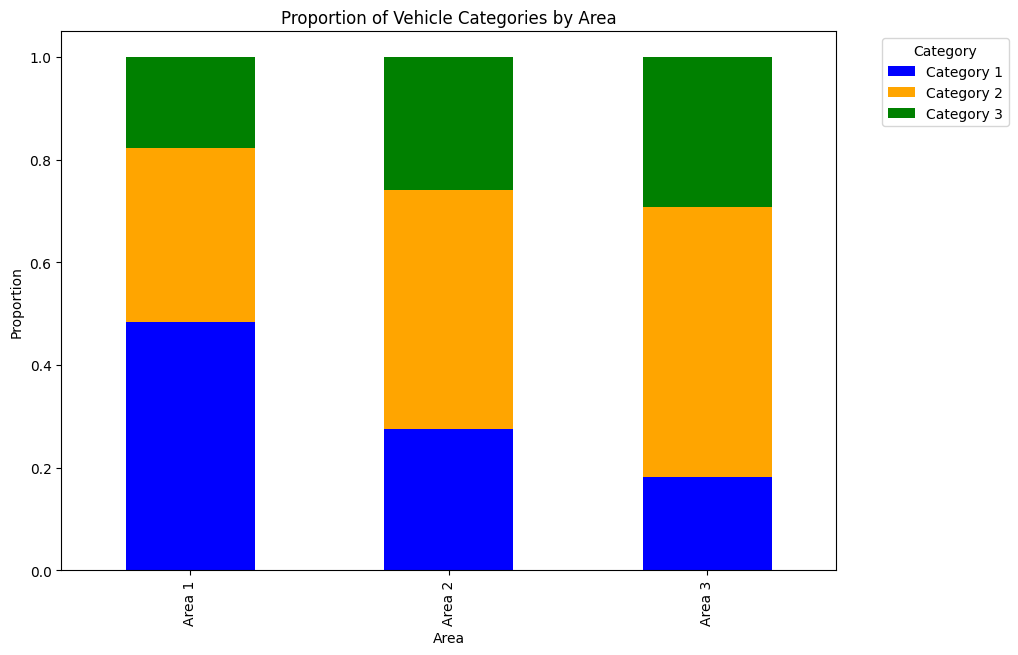

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Данные категорий и зон
data = {
    'Area': ['Area 1', 'Area 1', 'Area 1', 'Area 2', 'Area 2', 'Area 2', 'Area 3', 'Area 3', 'Area 3'],
    'Category': ['Category 1', 'Category 2', 'Category 3', 'Category 1', 'Category 2', 'Category 3', 'Category 1', 'Category 2', 'Category 3'],
    'Count': [242, 169, 89, 138, 232, 130, 91, 263, 146]
}
category_counts = pd.DataFrame(data)

# Pivot таблица для удобства построения графика
pivot_table = category_counts.pivot(index='Area', columns='Category', values='Count').fillna(0)

# Нормализация данных для представления в процентах
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Построение stacked bar chart
ax = pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(10, 7), color=['blue', 'orange', 'green'])

# Настройка осей и заголовков
ax.set_xlabel('Area')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Vehicle Categories by Area')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


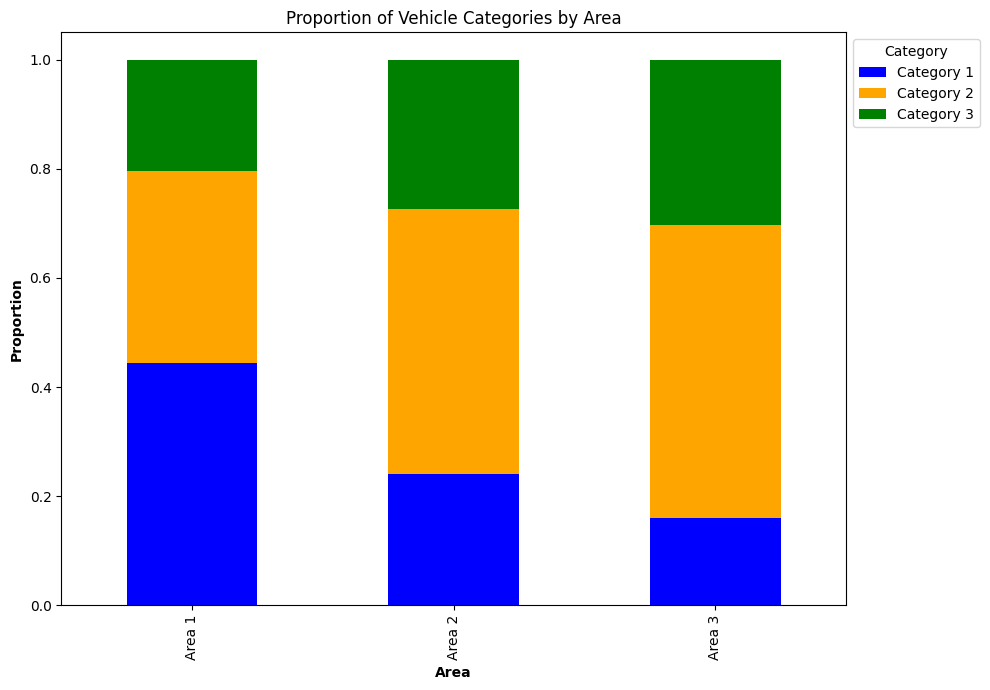

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create variables for the second category (vehicles that cancel the trip)
trips_df['Cat2_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 0)).astype(int)
trips_df['Cat2_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 0)).astype(int)
trips_df['Cat2_Area3'] = ((trips_df['Cat1_Area3'] == 0) & (trips_df['Cat3'] == 0)).astype(int)

# Create variables for the third category (vehicles that wait and then proceed)
trips_df['Cat3_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
trips_df['Cat3_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
trips_df['Cat3_Area3'] = ((trips_df['Cat1_Area3'] == 0) & (trips_df['Cat3'] == 1)).astype(int)

# Calculate the counts for each category
category_counts = {
    'Area 1': [trips_df['Cat1_Area1'].sum(), trips_df['Cat2_Area1'].sum(), trips_df['Cat3_Area1'].sum()],
    'Area 2': [trips_df['Cat1_Area2'].sum(), trips_df['Cat2_Area2'].sum(), trips_df['Cat3_Area2'].sum()],
    'Area 3': [trips_df['Cat1_Area3'].sum(), trips_df['Cat2_Area3'].sum(), trips_df['Cat3_Area3'].sum()]
}

# Create DataFrame for plotting
category_counts_df = pd.DataFrame(category_counts, index=['Category 1', 'Category 2', 'Category 3'])

# Normalize the counts to proportions
category_counts_percentage = category_counts_df.div(category_counts_df.sum(axis=0), axis=1)

# Plotting stacked bar chart
category_counts_percentage.T.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'], figsize=(10, 7))

# Add labels
plt.xlabel('Area', fontweight='bold')
plt.ylabel('Proportion', fontweight='bold')
plt.title('Proportion of Vehicle Categories by Area')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Category')
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Create variables for the second category (vehicles that cancel the trip)
trips_df['Cat2_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 0)).astype(int)
trips_df['Cat2_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 0)).astype(int)
trips_df['Cat2_Area3'] = ((trips_df['Cat1_Area3'] == 0) & (trips_df['Cat3'] == 0)).astype(int)

# Create variables for the third category (vehicles that wait and then proceed)
trips_df['Cat3_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
trips_df['Cat3_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
trips_df['Cat3_Area3'] = ((trips_df['Cat1_Area3'] == 0) & (trips_df['Cat3'] == 1)).astype(int)

# Calculate the counts for each category
category_counts = {
    'Area 1': [trips_df['Cat1_Area1'].sum(), trips_df['Cat2_Area1'].sum(), trips_df['Cat3_Area1'].sum()],
    'Area 2': [trips_df['Cat1_Area2'].sum(), trips_df['Cat2_Area2'].sum(), trips_df['Cat3_Area2'].sum()],
    'Area 3': [trips_df['Cat1_Area3'].sum(), trips_df['Cat2_Area3'].sum(), trips_df['Cat3_Area3'].sum()]
}

# Create DataFrame for category counts
category_counts_df = pd.DataFrame(category_counts, index=['Category 1', 'Category 2', 'Category 3'])

# Display the table
print(category_counts_df)

# Save the table to a CSV file if needed
category_counts_df.to_csv('category_counts_table.csv', index=True)


            Area 1  Area 2  Area 3
Category 1    2222    1207     798
Category 2    1762    2420    2686
Category 3    1016    1373    1516


In [ ]:
import pandas as pd

# Assume the emissions data is already calculated in the DataFrame
# We will use 'total_emissions' column for the actual emissions data

# Create variables for the second category (vehicles that cancel the trip)
trips_df['Cat2_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 0)).astype(int)
trips_df['Cat2_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 0)).astype(int)
trips_df['Cat2_Area3'] = ((trips_df['Cat1_Area3'] == 0) & (trips_df['Cat3'] == 0)).astype(int)

# Create variables for the third category (vehicles that wait and then proceed)
trips_df['Cat3_Area1'] = ((trips_df['Cat1_Area1'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
trips_df['Cat3_Area2'] = ((trips_df['Cat1_Area2'] == 0) & (trips_df['Cat3'] == 1)).astype(int)
trips_df['Cat3_Area3'] = ((trips_df['Cat1_Area3'] == 0) & (trips_df['Cat3'] == 1)).astype(int)

# Calculate the emissions for each category in each area
emissions_category1_area1 = trips_df[trips_df['Cat1_Area1'] == 1]['total_emissions'].sum()
emissions_category1_area2 = trips_df[trips_df['Cat1_Area2'] == 1]['total_emissions'].sum()
emissions_category1_area3 = trips_df[trips_df['Cat1_Area3'] == 1]['total_emissions'].sum()

emissions_category3_area1 = trips_df[trips_df['Cat3_Area1'] == 1]['total_emissions'].sum()
emissions_category3_area2 = trips_df[trips_df['Cat3_Area2'] == 1]['total_emissions'].sum()
emissions_category3_area3 = trips_df[trips_df['Cat3_Area3'] == 1]['total_emissions'].sum()

# Calculate the total emissions for Category 2 (no emissions)
emissions_category2_area1 = -(trips_df['Cat2_Area1'].sum() * trips_df['total_emissions'].mean())
emissions_category2_area2 = -(trips_df['Cat2_Area2'].sum() * trips_df['total_emissions'].mean())
emissions_category2_area3 = -(trips_df['Cat2_Area3'].sum() * trips_df['total_emissions'].mean())

# Create a DataFrame to present the results
emissions_data = {
    'Area 1': [emissions_category1_area1, emissions_category3_area1, emissions_category2_area1],
    'Area 2': [emissions_category1_area2, emissions_category3_area2, emissions_category2_area2],
    'Area 3': [emissions_category1_area3, emissions_category3_area3, emissions_category2_area3]
}

emissions_df = pd.DataFrame(emissions_data, index=['Category 1', 'Category 3', 'Category 2'])

# Calculate the total emissions
emissions_df.loc['Total'] = emissions_df.sum()

# Display the table
print(emissions_df)

# Save the table to a CSV file if needed
emissions_df.to_csv('emissions_by_category_and_area.csv', index=True)


                  Area 1        Area 2        Area 3
Category 1  25800.575681  19098.054463  16492.522110
Category 3  27704.106132  34406.627351  37012.159704
Category 2 -18855.049871 -25896.265998 -28742.715070
Total       34649.631943  27608.415816  24761.966744
